Link to the course: https://huggingface.co/course

# Content

# 1. Transformers Models

The `pipeline` object from transformers library connects a model with all necessary preprocessing and postprocessing steps.

**Examples:**

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
print(classifier("I've been waiting for a HuggingFace course my whole life."))
print(classifier([
    "I've been waiting for a HuggingFace course my whole life.", 
    "I hate this so much!"
]))

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
2021-10-16 22:45:08.263901: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-16 22:45:08.264575: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-16 22:45:08.267449: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2021-10-16 22:45:08.284707: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future

[{'label': 'POSITIVE', 'score': 0.9598046541213989}]

A list with available pipelines may be found [here](https://huggingface.co/transformers/main_classes/pipelines.html).

## How do Transformers work?

Language models, self-supervised learning, transfer learning.

Transformers are **language models**. This type of model develops a statiscal understanding of the language it was tranined on.

## Encoder Models

Encoder models use only the encoder part of the transformer. Such models are best suited for tasks that require a knowledge of the whole sentence (eg. NER, sentence classification).

## Decoder Models

Decoder models use only de decoder part of the transformer. At each stage, they have access only to the words preceding the current word. These models are often called auto-regressive models. Such models are best suited for tasks that involves text generation.

## Encoder-Decoder Models (Sequence to Sequence)

These models use both parts of the transformer architecture. Sequence-to-sequence models are best suited for tasks revolving around generating new sentences depending on a given input (eg. summarization, translation).

## Limitations and Bias

In the above code, note how the models generates professions skewed based on gender. For instance "carpenter" is often associated with a men's work while "nurse" is associated with a women's.

In [1]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

2021-10-17 21:20:50.200597: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-17 21:20:50.201160: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-17 21:20:50.203377: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
All model checkpoint layers were used when initializing TFBertForMaskedLM.

All the layers of TFBertForMaskedLM were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for pr

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']
['nurse', 'maid', 'teacher', 'waitress', 'prostitute']


# 2. Using Hugging Face Transformers

## Behind the pipeline

Let's take a look on how the pipeline tool works under the hood.

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

A pipeline groups together three steps: preprocessing, model and postprocessing:

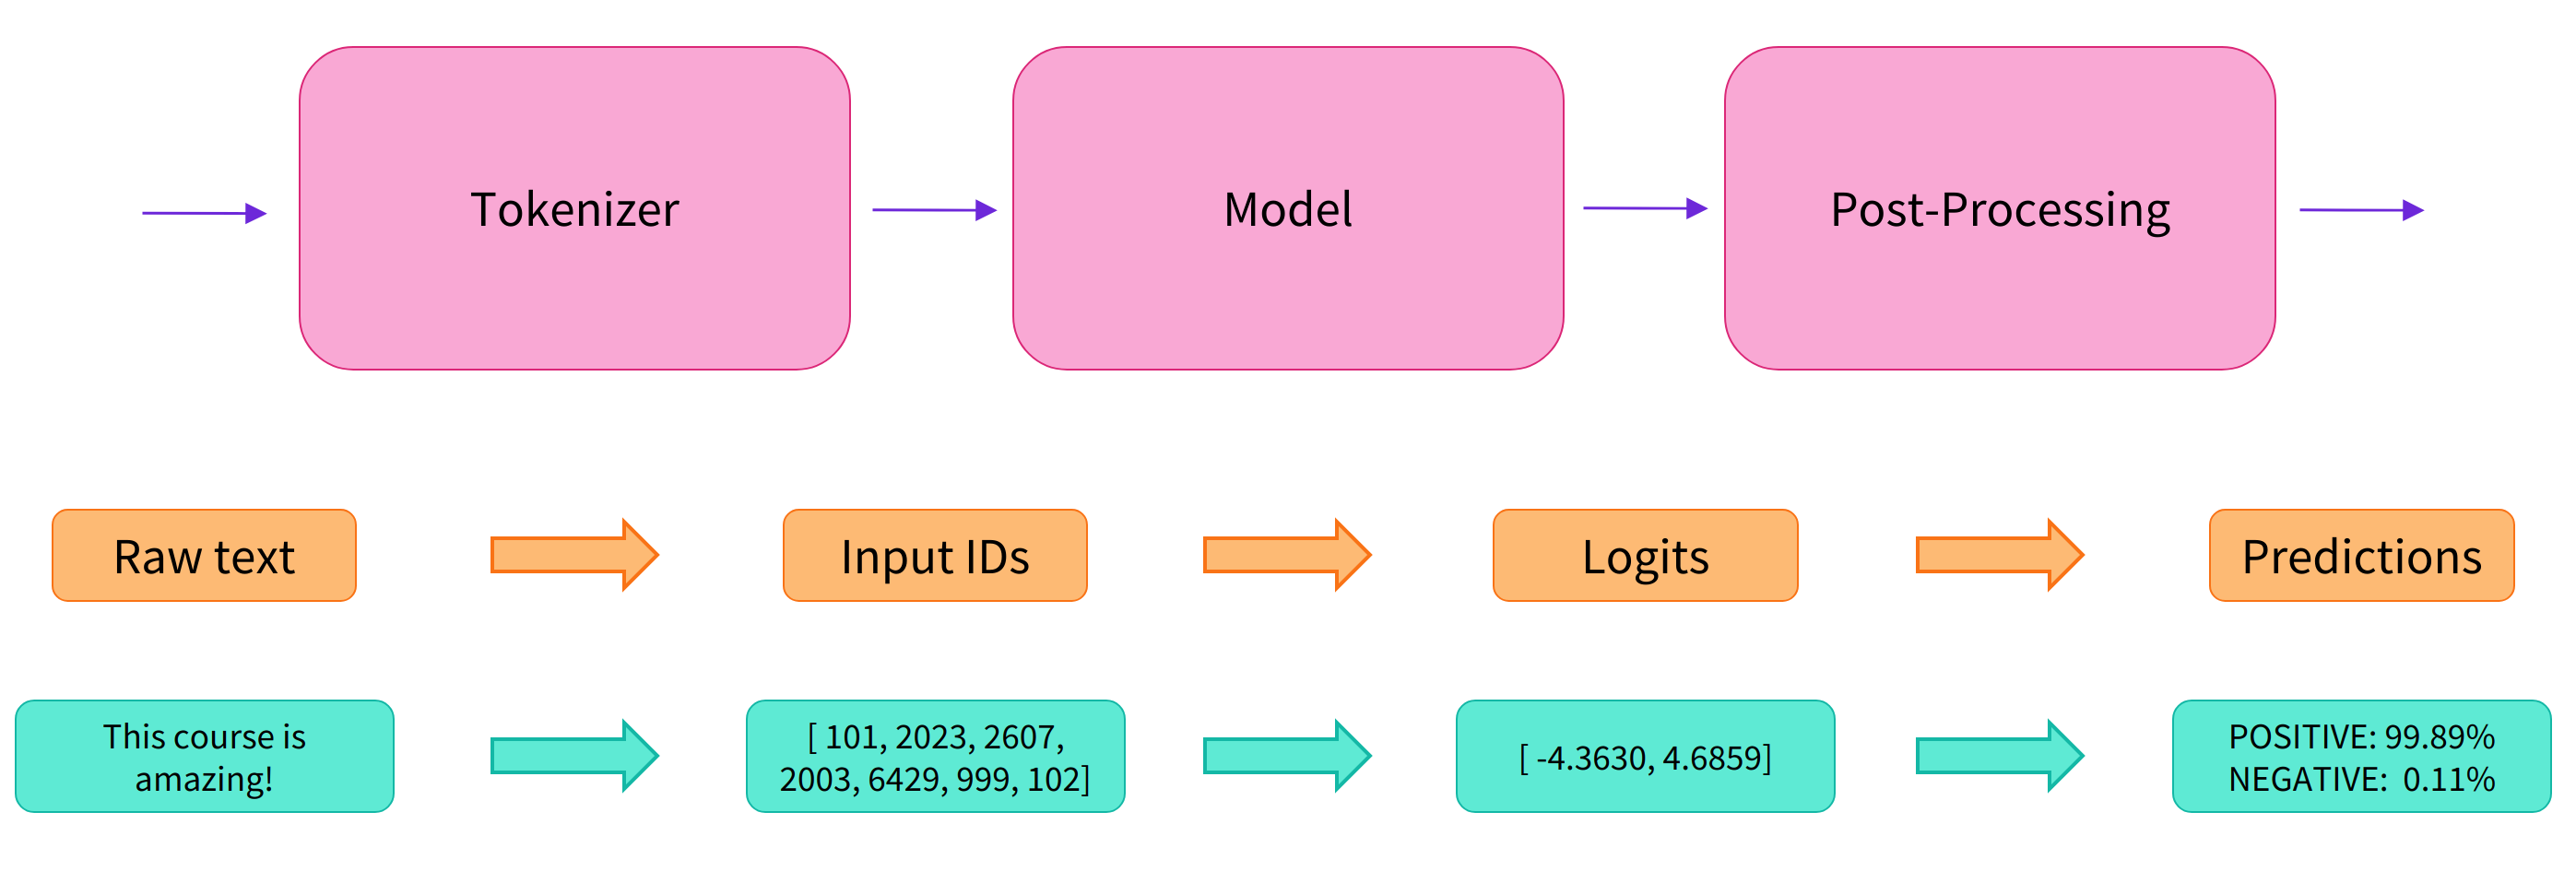

### Preprocessing with a tokenizer

The preprocessing step aims at converting text to more a ML-friendly format. This preprocessing must be done exactly the same way as the model used on pretraining.

That information is available in the model checkpoint from Model Hub. Using the `AutoTokenizer` class and its `from_pretrained()` method, the information associated with model's tokenizer is fetched.

In [5]:
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

In [6]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Sentences passed to the `tokenizer` are ready to go through the model. The outputs are tensors, whose type (PyTorch, TensorFlow, NumPy) may be specified by the `return_tensors` argument.

In [10]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]

inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="tf")

print(inputs)

{'input_ids': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662,
        12172,  2607,  2026,  2878,  2166,  1012,   102],
       [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,
            0,     0,     0,     0,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>}


### Going through the model

Similarly to how tokenizer works, the model may downloaded from Model Hub. The `TFAutoModel` class also provides a `from_pretrained` method for easy loading models.

In [11]:
from transformers import TFAutoModel

model = TFAutoModel.from_pretrained(checkpoint)

Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertModel: ['pre_classifier', 'classifier', 'dropout_19']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [13]:
type(model)

transformers.models.distilbert.modeling_tf_distilbert.TFDistilBertModel

This architecture contains only the base Transformer module: given some inputs, it outputs the hidden states - features.

This hidden states on their might be useful, but they're usually used as inputs to another part of the model, known as **head**. Different pipelines may share the same architecture but with different heads associated with each of the them.

#### A high-dimensional vector?

The output of the model has three dimensions:

- Batch size: The number of sequences processed at a time.
- Sequence length: The length of the numerical representation of the sequence.
- Hidden size: The vector dimension of each model input.

In [19]:
outputs = model(inputs)

print(type(outputs))
print(outputs.last_hidden_state.shape)

<class 'transformers.modeling_tf_outputs.TFBaseModelOutput'>
(2, 16, 768)


> Note that the outputs of 🤗 Transformers models behave like `namedtuples` or dictionaries. You can access the elements by attributes (like we did) or by key (`outputs["last_hidden_state"]`), or even by index if you know exactly where the thing you are looking for is (`outputs[0]`).


#### Model heads: Making sense out of numbers

Model heads project the hidden states vector onto a different dimension. They are usually composed of one or a few linear layers:
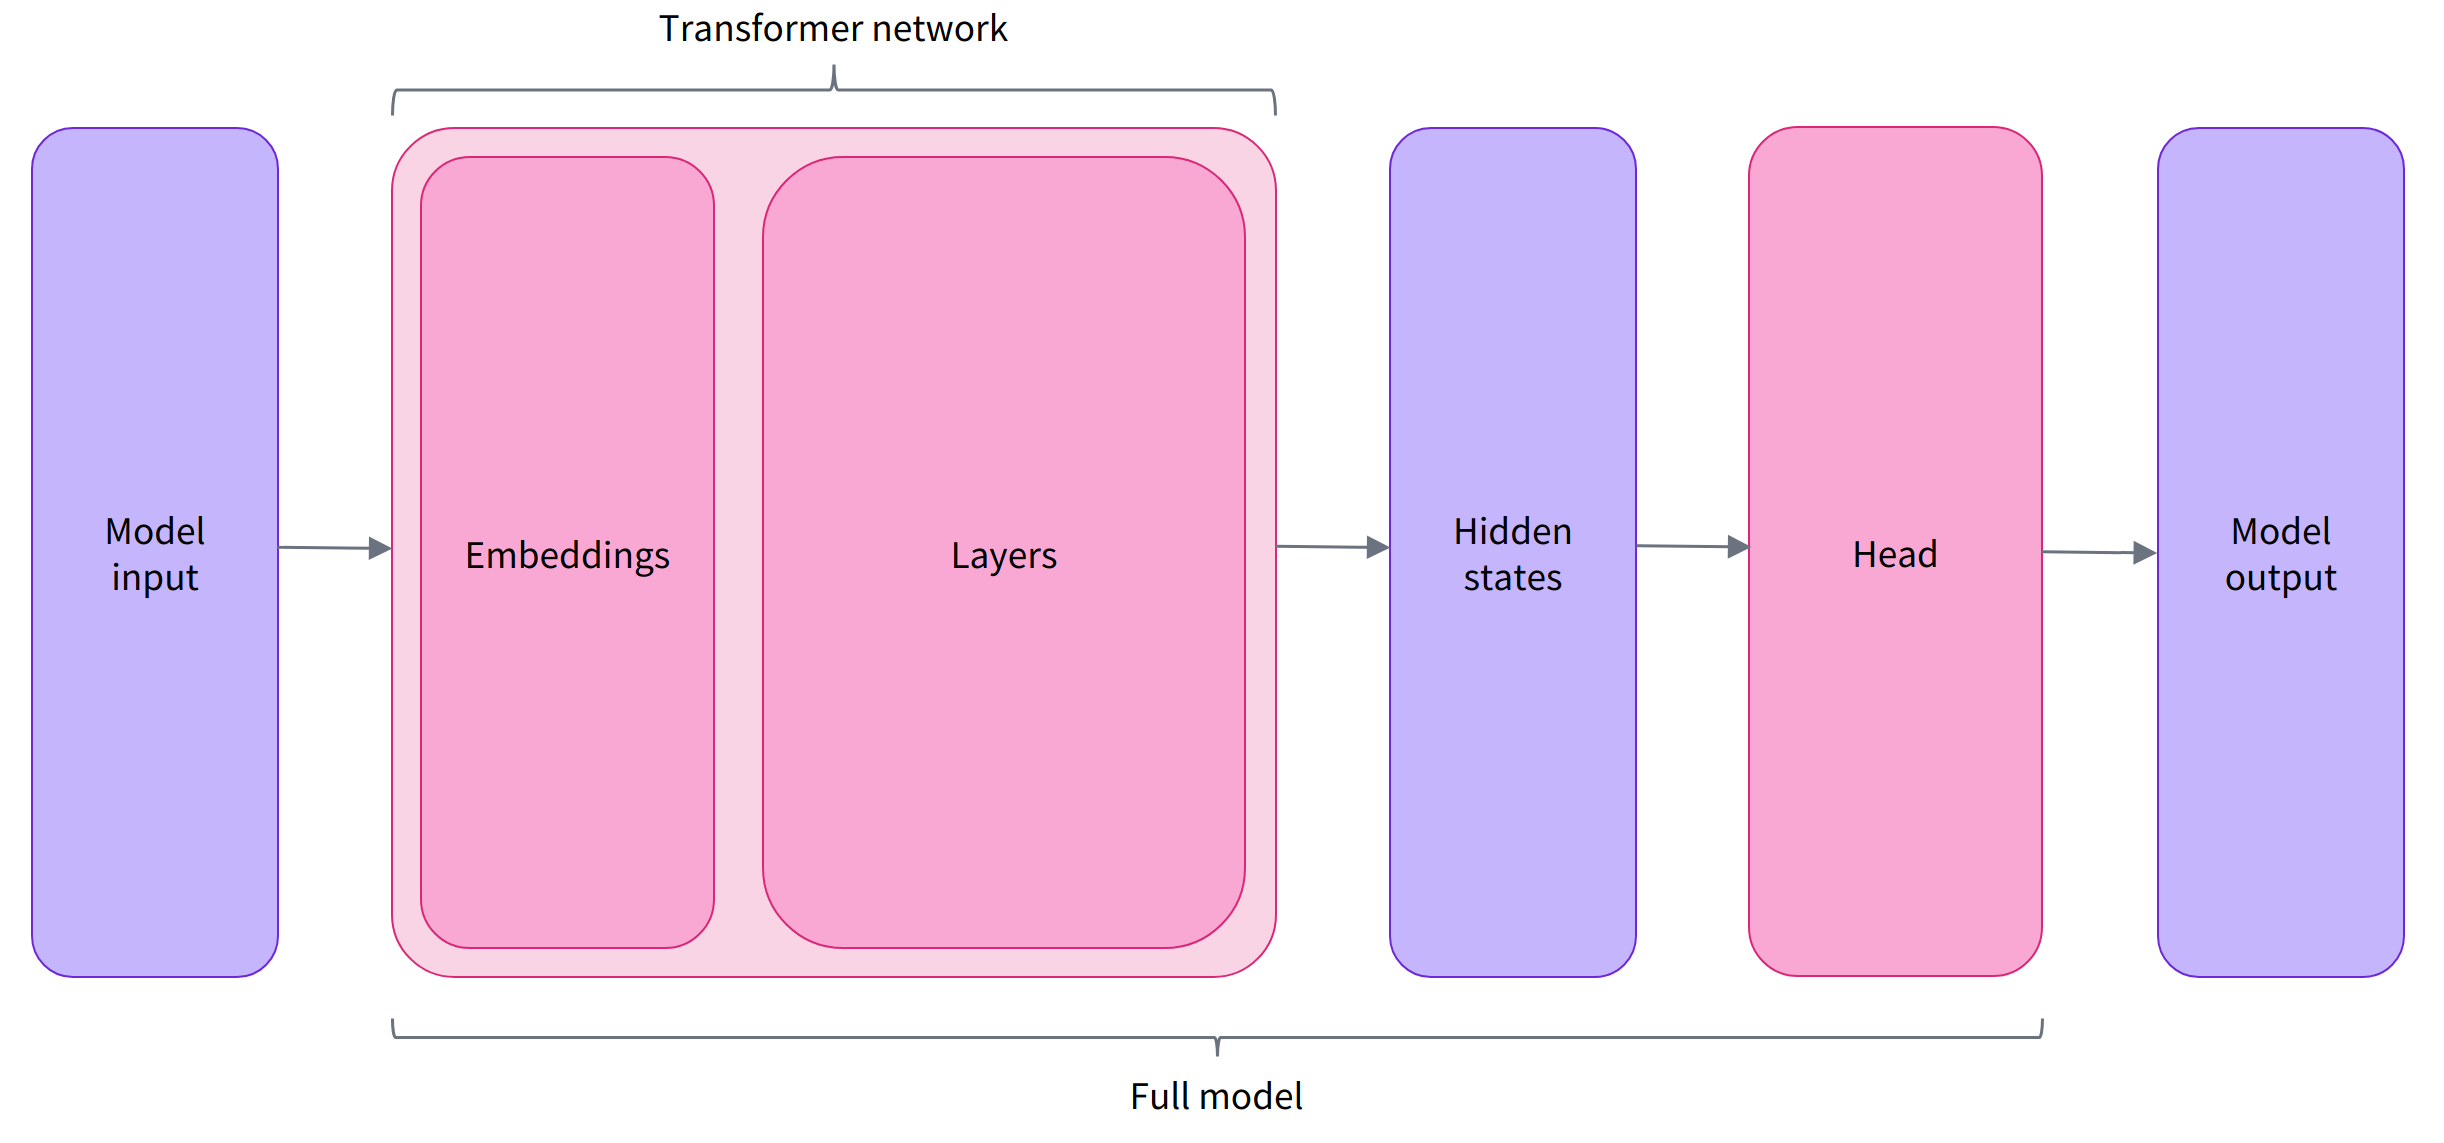

There are many different architectures available:

- Model (retrieve the hidden states)
- ForCausalLM
- ForMaskedLM
- ForMultipleChoice
- ForQuestionAnswering
- ForSequenceClassification
- ForTokenClassification
- and others 🤗

In [20]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(inputs)

Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized: ['dropout_57']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
print(outputs.logits.shape)

(2, 2)


### Postprocessing the output

The imediate output of the model does not seem to make much sense:

In [23]:
print(outputs.logits)

tf.Tensor(
[[-1.5606974  1.6122825]
 [ 4.1692324 -3.346448 ]], shape=(2, 2), dtype=float32)


These outputs are not probabilities but logits: the raw, unnormalized scores outputted by the last layer of the model. To be coverted to probabilities they need to go through a SoftMax layer.

In [24]:
import tensorflow as tf

predictions = tf.math.softmax(outputs.logits, axis=-1)
print(predictions)

tf.Tensor(
[[4.0195297e-02 9.5980471e-01]
 [9.9945587e-01 5.4418319e-04]], shape=(2, 2), dtype=float32)


The labels associated with each output position is available on `id2label` attribute.

In [25]:
print(model.config.id2label)

{0: 'NEGATIVE', 1: 'POSITIVE'}


Now we can conclude that the model predicted the following:

- First sentence: `NEGATIVE: 0.0402`, `POSITIVE: 0.9598`
- Second sentence: `NEGATIVE: 0.9995`, `POSITIVE: 0.0005`

## Models

The `TFAutoModel` class and all of its relatives are simple wrappers over the models available. It can guess the model architecture based on the checkpoint.

If the model being used is known, the class that defines it may be used directly.

### Creating a Transformer

In [26]:
from transformers import BertConfig, TFBertModel

# Building the config
config = BertConfig()

# Building the model from the config
model = TFBertModel(config)

The configuration contains many attributes that are used to build the model

In [27]:
print(config)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.11.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



The model in that state isn't useful, we must load the pretrained weights before using it.

In [28]:
from transformers import TFBertModel

model = TFBertModel.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


We can also save a model if needed:

In [30]:
model.save_pretrained("directory_on_my_computer")

In [32]:
!ls directory_on_my_computer

config.json  tf_model.h5


### Using a Transformer model for inference

# 3. Fine-tuning a pretrained model

# 4 Sharing models and tokenizers